Nama : Arini Alfi Mawadhah <br>

# Churn Analysis (Data Science Project)

# 1. Import relevant libraries

In [ ]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew


# sklearn modules for data preprocessing-------------------------------------

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold

from sklearn.metrics import precision_recall_curve,auc,roc_auc_score,roc_curve


#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix

#Miscellaneous Utilitiy Libraries--------------------------------------


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Set Up the current working directory & Import Dataset

In [ ]:
# Step 2: Import the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/customer_churn_data.csv')
#Dataset dari sebuah perusahaan telco,yamg melihat nasabah yang berpotensi churn

#Step 3: Read Dataset
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 4. Evaluate Data Structure

In [ ]:
# Step 4: Evaluate data structure
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Recheck Column Datatypes and Missing Values:
dataset.columns.to_series().groupby(dataset.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Apakah asa yang null atau tidak?
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
#Unique values in each categorical variable:
dataset['PaymentMethod'].nunique()
dataset['PaymentMethod'].unique()


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
dataset['Contract'].nunique()
dataset['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

# 5. Check Target Variable Distribution

In [ ]:
#Step 5: Check Target Variable Distribution -----------------------------------------------

dataset["Churn"].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

Precision = Mengutamakan Quality (Ini untuk dataset finansial)

Recall    = Mengutamakan Quantity (Ini untuk dataset kesehatan)

What happen here?

Answer:..........

# 6. Clean the Dataset

In [ ]:
#Step 6: Clean the Dataset----------------------------------------------------------------------
#Tadinya berupa categorical kita ubah menjadi numerical --> Aslinya memang angka tapi kedetect sebagai categorical
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')
dataset['TotalCharges'] = dataset['TotalCharges'].astype("float")

In [ ]:
#Step 7: Take care of missing data---------------------------------------------------------------
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [ ]:
# Find the average/median and fill missing values of each columns programmatically.
na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()

# Isi missing value dengan rata-rata (Cek kolom yang tidak bertipe object)
for col in dataset.columns[1:]:
  if col in na_cols:
    if dataset[col].dtype != 'object' :
      dataset[col]= dataset[col].fillna(dataset[col].mean()).round(0)

In [ ]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

# 8. Label Encode Binary data

In [ ]:
#Step 8: label Encode Binary data----------------------------------------------------------------

#Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0 # variable untuk menghitung berapa kolom yang di encoder
for col in dataset.columns[1:]:
  if dataset[col].dtype == 'object':
    if len(list(dataset[col].unique())) <=2: #Yang unique value kurang atau sama dengan 2
       print(col)
       le.fit(dataset[col])
       dataset[col] = le.transform(dataset[col])
       le_count += 1
print('{}cloumns were label encoded.'.format(le_count))

gender
Partner
Dependents
PhoneService
PaperlessBilling
Churn
6cloumns were label encoded.


# 9. Exploratory Data Analysis

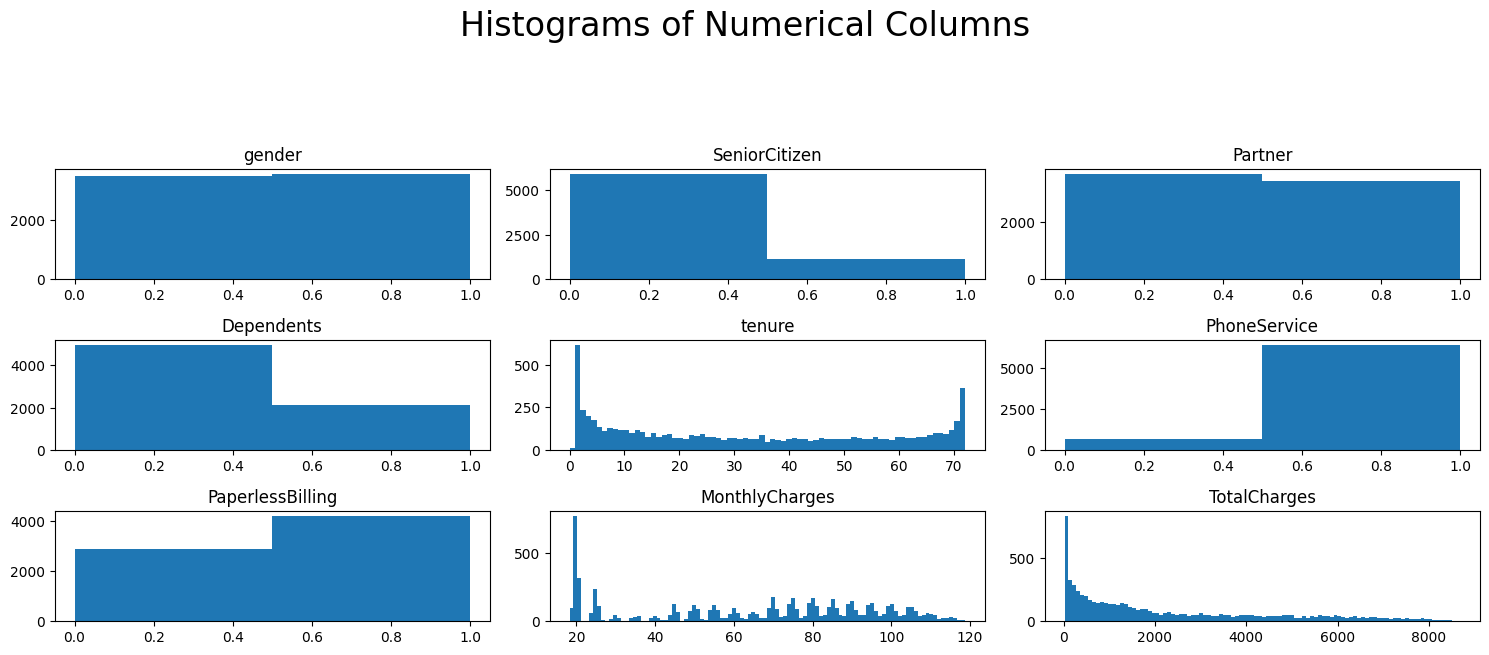

In [ ]:
#Step 9: Exploratory Data Analysis----------------------------------------------------------------------

#Step 9.1. Plot Histogram of numeric Columns--------------------------------------

dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]
#Histogram:

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset2.iloc[:, i], bins=vals)#, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

What are the insights from diagram above?

In [ ]:
dataset['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

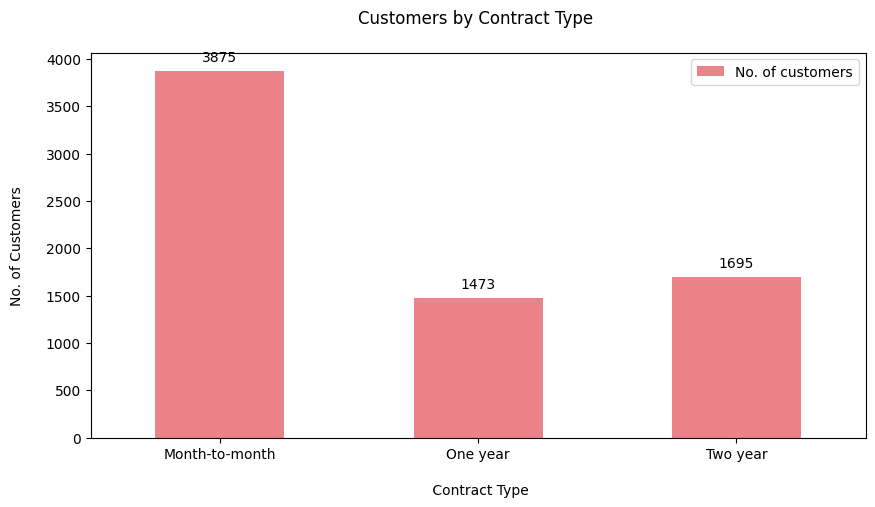

In [ ]:
#Step 9.2. Analyze distribution of Key Categorical Variables---------------------------------------------


#(1) Distribution of Contract Type----------------------------------------------------------------------------------------

contract_split = dataset[[ "customerID", "Contract"]]
sectors = contract_split .groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type', legend =True, table = False, grid = False,  subplots = False,  figsize =(10, 5), color ='#ec838a', stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Customers by Contract Type \n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

What can be derived from above diagram?

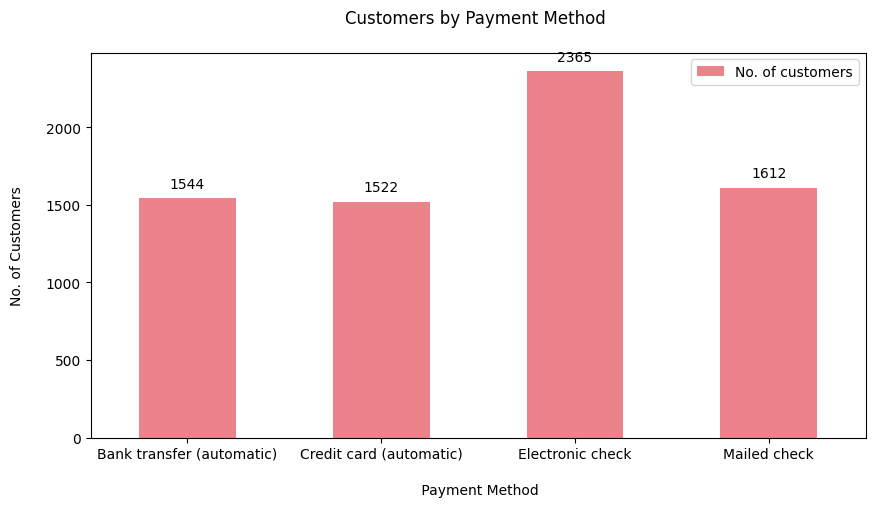

In [ ]:
#(2) Distribution of Payment Method Type---------------------------------------------------------------------------------------

payment_method_split = dataset[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split  .groupby ("PaymentMethod")
payment_method_split  = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  payment_method_split [["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False,  subplots = False,  figsize =(10, 5), color ='#ec838a', stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('\n Payment Method',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Customers by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(payment_method_split [["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

What can be derived from above diagram?

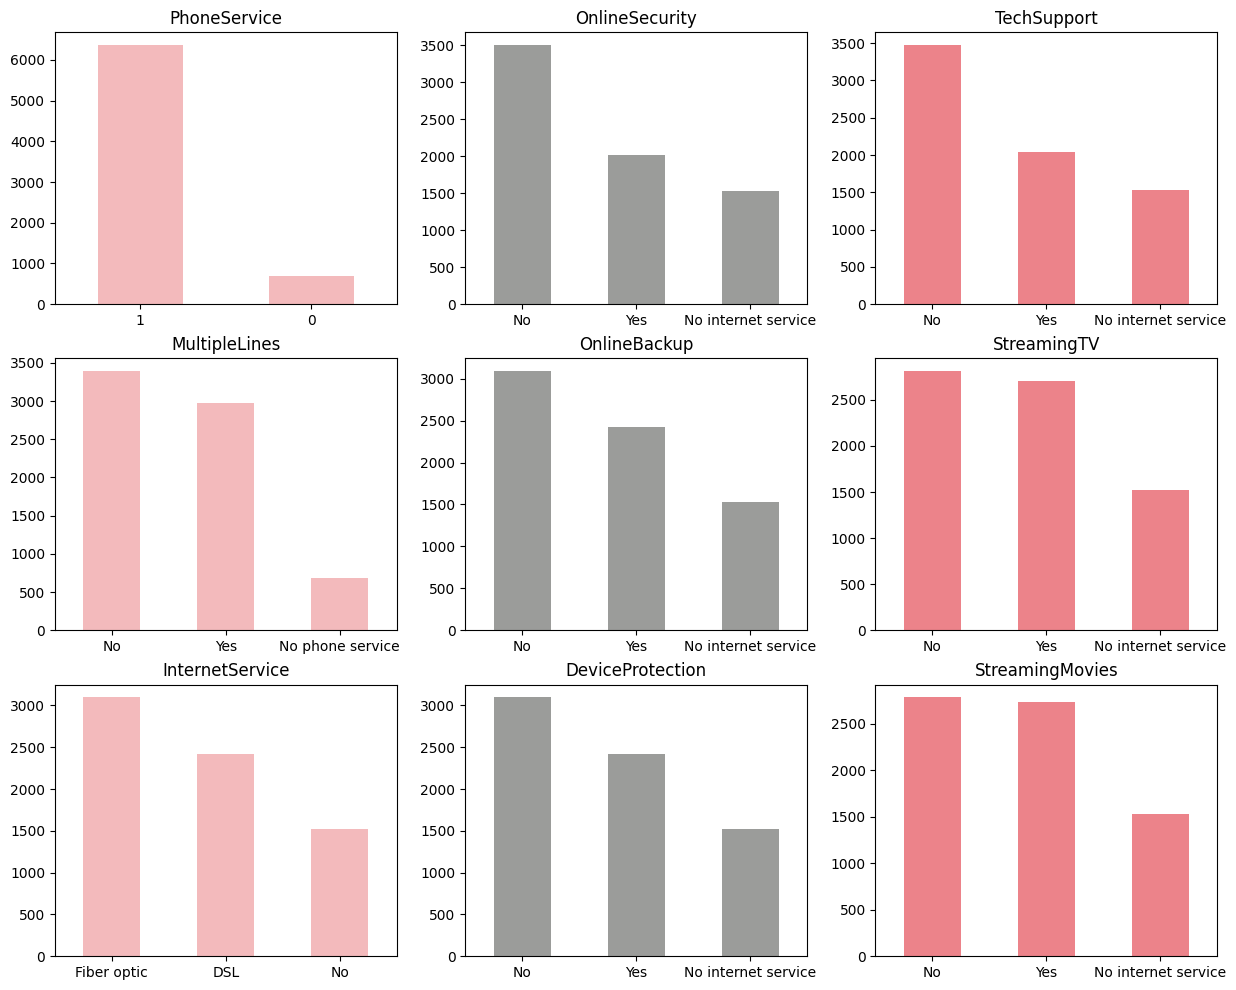

In [ ]:
#(3) Distribution of various Label Encoded Categorical Variables---------------------------------------------------------------------------------------

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )

    elif i >=3 and i < 6:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#9b9c9a')

    elif i < 9:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')
    ax.set_title(item)

What are the insights from above diagrams?

<ipython-input-293-b3e0f76d8f18>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))


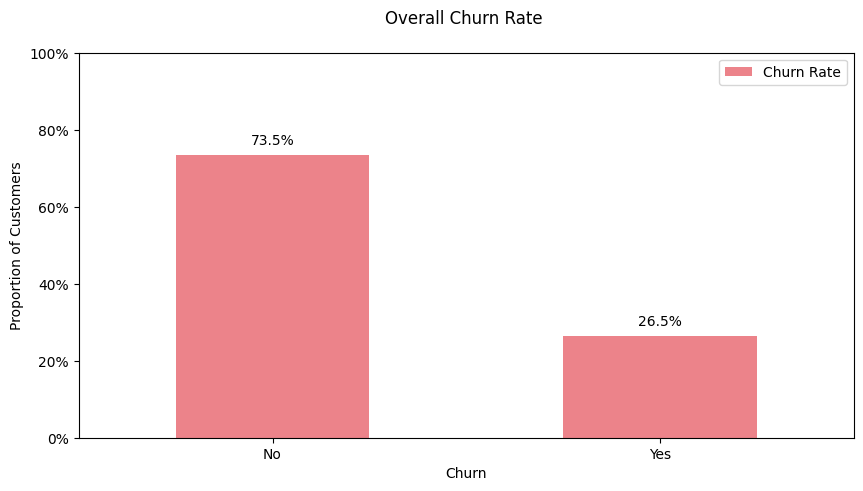

In [ ]:
#Step 9.3: Analyze Churn Rate by Categorical variables:   -------------------------------------------------------------

#(1) Overall Churn Rate------------------------------------------------------------------------------------------
import matplotlib.ticker as mtick
churn_rate = dataset[["Churn", "customerID"]]
churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate ["Churn Rate"] = (churn_rate ["customerID"] / sum(churn_rate ["customerID"]) )*100
ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate', legend =True, table = False, grid = False,  subplots = False,  figsize =(10, 5), color = '#ec838a', stacked=False, ylim =(0,100))

plt.ylabel('Proportion of Customers',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["customerID"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.1f}%".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)


In [ ]:
dataset[['Contract', 'Churn']].value_counts()

Contract        Churn
Month-to-month  0        2220
                1        1655
Two year        0        1647
One year        0        1307
                1         166
Two year        1          48
dtype: int64

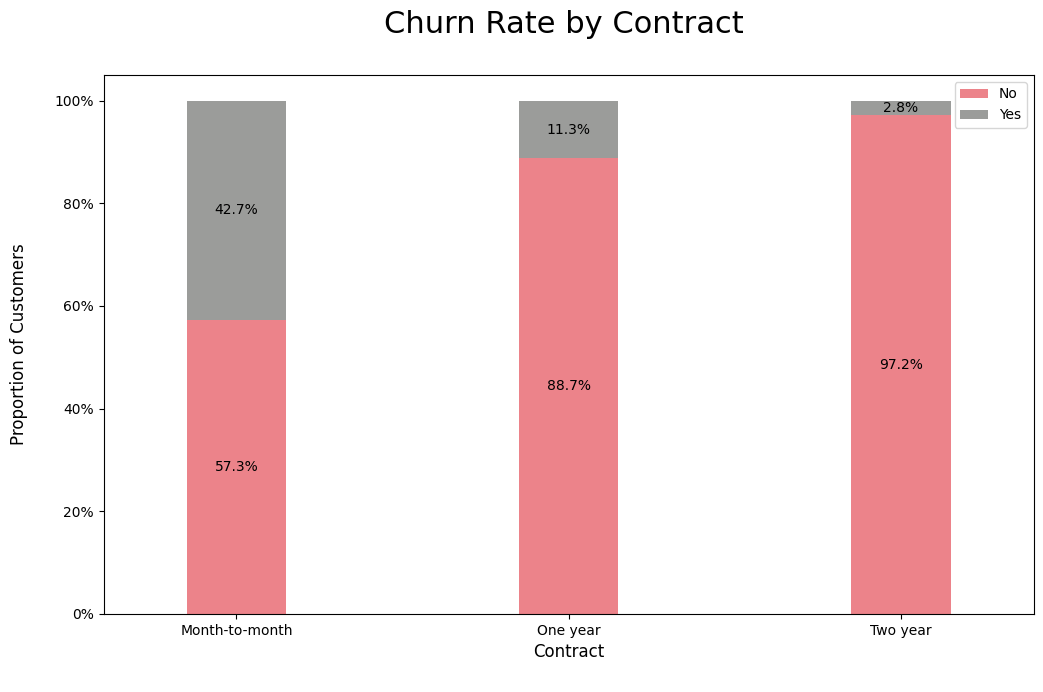

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.ticker as mtick
contract_churn = dataset.groupby(['Contract', 'Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a', '#f3babc' , '#4d4f4c']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,7),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Contract \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)



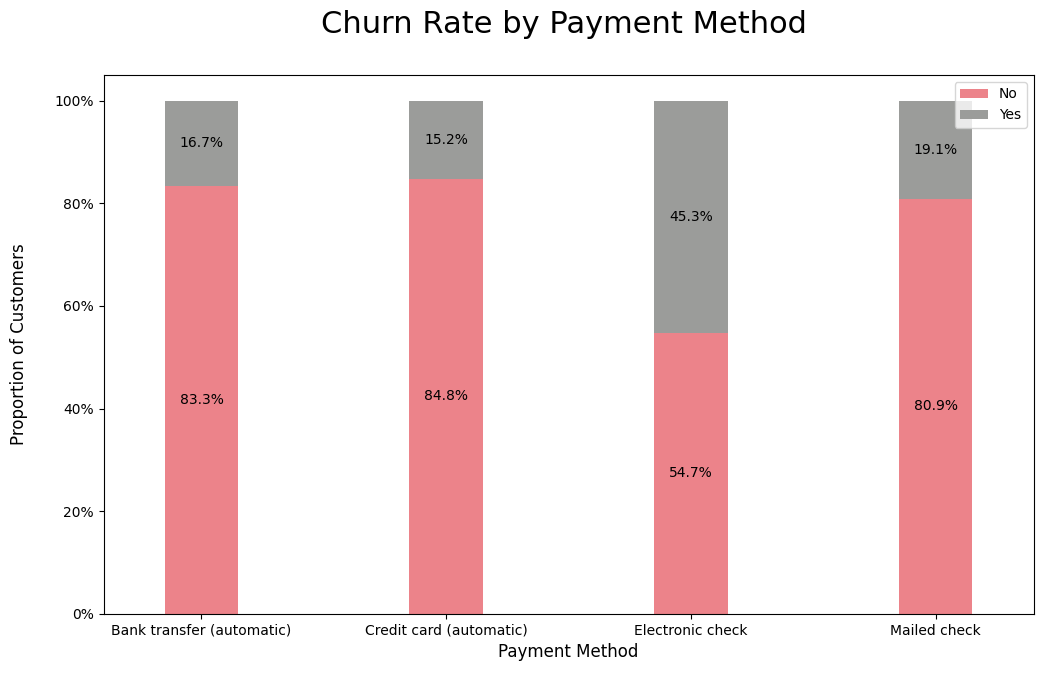

In [ ]:
import matplotlib.ticker as mtick
contract_churn = dataset.groupby(['PaymentMethod', 'Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a', '#f3babc' , '#4d4f4c']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,7),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Payment Method\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)


# 10. Encode Categorical Data

In [ ]:
#Step 10: Encode Categorical data----------------------------------------------------------------

#Incase if user_id is an object:

identity = dataset["customerID"]

dataset = dataset.drop(columns="customerID")

# convert rest of categorical variable into dummy

dataset= pd.get_dummies(dataset)

#Rejoin userid to dataset (column concatenation)

dataset = pd.concat([dataset, identity], axis = 1)


In [ ]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID
0,0,0,1,0,1,0,1,29.85,30.0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,7590-VHVEG
1,1,0,0,0,34,1,0,56.95,1890.0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,5575-GNVDE
2,1,0,0,0,2,1,1,53.85,108.0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,3668-QPYBK
3,1,0,0,0,45,0,0,42.30,1841.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,7795-CFOCW
4,0,0,0,0,2,1,1,70.70,152.0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,9237-HQITU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,6840-RESVB
7039,0,0,1,1,72,1,1,103.20,7363.0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,2234-XADUH
7040,0,0,1,1,11,0,1,29.60,346.0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,4801-JZAZL
7041,1,1,1,0,4,1,1,74.40,307.0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,8361-LTMKD


# 11. Split Dataset into Dependent and Independent Variables

In [ ]:
#Step 11: Split dataset into dependent and independent variables-----------------------------------

#identify response variable:
response  = dataset['Churn'] #Y atau target
dataset  = dataset.drop(columns= 'Churn') #X atau prediktor


In [ ]:
response

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID
0,0,0,1,0,1,0,1,29.85,30.0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,7590-VHVEG
1,1,0,0,0,34,1,0,56.95,1890.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,5575-GNVDE
2,1,0,0,0,2,1,1,53.85,108.0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,3668-QPYBK
3,1,0,0,0,45,0,0,42.30,1841.0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,7795-CFOCW
4,0,0,0,0,2,1,1,70.70,152.0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,9237-HQITU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,6840-RESVB
7039,0,0,1,1,72,1,1,103.20,7363.0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,2234-XADUH
7040,0,0,1,1,11,0,1,29.60,346.0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,4801-JZAZL
7041,1,1,1,0,4,1,1,74.40,307.0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,8361-LTMKD


# 12. Generate training and test datasets of dependent and independent variables


In [ ]:
#Step 12: Generate training and test datasets of dependent and independent variables-----------------


X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    stratify=response,
                                                    test_size = 0.2, #use 0.1 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 41)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 41)
Number transactions y_test dataset:  (1409,)


# 13. Removing Identifiers

In [ ]:
# Step 13: Removing Identifiers-------------------------------------------------------------------
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])

test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,1,0,0,1,41,1,0,70.20,2895.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
5807,1,0,0,0,57,1,0,18.80,1094.0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
5118,0,0,1,0,42,1,1,85.90,3730.0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0
275,1,0,1,0,5,1,1,85.40,401.0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
1350,0,0,1,0,67,1,0,65.65,4323.0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,0,0,0,0,29,1,1,55.25,1620.0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1954,1,0,0,0,1,1,1,75.45,75.0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
525,1,0,0,0,52,1,0,91.25,4738.0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
5748,0,0,0,0,21,1,1,99.85,1993.0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0


# 14. Feature Scaling

In [ ]:
# Step 14: Feature Scaling-----------------------------------------------------------------------

sc_X = StandardScaler()
X_train2 = pd.Dataframe(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.Dataframe(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,0.996103,-0.444067,-0.961343,1.545268,0.363266,0.327252,-1.203537,0.193982,0.283964,1.030277,-0.327252,-0.847780,1.367515,-0.872769,-0.529854,-0.986250,-0.529854,1.573414,-0.881957,-0.529854,1.383161,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624290,-0.818733,-0.529854,1.278739,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,-0.707107,1.825882
5807,0.996103,-0.444067,-0.961343,-0.647137,1.016103,0.327252,-1.203537,-1.515002,-0.515001,1.030277,-0.327252,-0.847780,-0.731253,-0.872769,1.887311,-0.986250,1.887311,-0.635561,-0.881957,1.887311,-0.722982,-0.888655,1.887311,-0.717014,-1.00071,1.887311,-0.624290,-0.818733,1.887311,-0.782021,-0.808189,1.887311,-0.792372,-1.116428,-0.510573,1.787480,-0.525181,1.884380,-0.707107,-0.547680
5118,-1.003913,-0.444067,1.040211,-0.647137,0.404069,0.327252,0.830884,0.715987,0.654390,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,1.133842,-0.529854,-0.722982,-0.888655,-0.529854,1.394673,-1.00071,-0.529854,1.601819,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,1.884380,-0.707107,-0.547680
275,0.996103,-0.444067,1.040211,-0.647137,-1.105616,0.327252,0.830884,0.699362,-0.822432,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,-0.881957,-0.529854,1.383161,1.125296,-0.529854,-0.717014,-1.00071,-0.529854,1.601819,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
1350,-1.003913,-0.444067,1.040211,-0.647137,1.424126,0.327252,-1.203537,0.042700,0.917459,-0.970613,-0.327252,1.179551,1.367515,-0.872769,-0.529854,-0.986250,-0.529854,1.573414,-0.881957,-0.529854,1.383161,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,-1.116428,-0.510573,1.787480,-0.525181,-0.530678,-0.707107,1.825882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,-1.003913,-0.444067,-0.961343,-0.647137,-0.126361,0.327252,0.830884,-0.303086,-0.281655,-0.970613,-0.327252,1.179551,1.367515,-0.872769,-0.529854,1.013942,-0.529854,-0.635561,-0.881957,-0.529854,1.383161,1.125296,-0.529854,-0.717014,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
1954,0.996103,-0.444067,-0.961343,-0.647137,-1.268825,0.327252,0.830884,0.368538,-0.967054,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,1.133842,-0.529854,-0.722982,1.125296,-0.529854,-0.717014,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
525,0.996103,-0.444067,-0.961343,-0.647137,0.812091,0.327252,-1.203537,0.893867,1.101562,1.030277,-0.327252,-0.847780,-0.731253,1.145778,-0.529854,-0.986250,-0.529854,1.573414,1.133842,-0.529854,-0.722982,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624

# 15. Model Selection

In [ ]:
#Step 15.1: Compare Baseline Classification Algorithms - First Iteration
#Using Accuracy and ROC AUC Mean Metrics


models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

# Other models
models.append(('Random Forest', RandomForestClassifier(n_estimators = 100, criterion='entropy',random_state = 0 )))

models.append(('XGBoost', XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=3)))

from sklearn.tree import DecisionTreeClassifier
models.append(('Decision Tree', DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_split=2)))


#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

from sklearn import model_selection

i=0
#Evaluate model dengan K-Fold Cross Validation
for name, model in models:
  kfold = model_selection.KFold(n_splits=10) #10 Fold Cross Validation
  cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(name)
  model_results.loc[i] = [name, round(cv_auc_results.mean()*100,2),
                          round(cv_auc_results.std()*100,2),
                          round(cv_acc_results.mean()*100,2),
                          round(cv_acc_results.std()*100,2)]
  i+=1
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,XGBoost,84.58,1.87,80.42,1.17
0,Logistic Regression,84.34,1.62,74.42,1.15
1,Random Forest,82.46,2.22,79.32,1.43
3,Decision Tree,81.78,1.39,79.00,1.41


# 16. Train & Evaluate Chosen Model

In [ ]:
#Step 16: Train & evaluate Chosen Model---------------------------------------------

# Fit Logistic Regression on the Training dataset:
classifier_lr = LogisticRegression(random_state=0, penalty='l2')
classifier_lr.fit(X_train, y_train)

# Predict the Test set results
y_pred_lr = classifier_lr.predict(X_test)

#Evaluate Model Results on Test Set:
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
f2_lr = fbeta_score(y_test, y_pred_lr, beta=2.0)

results_lr = pd.DataFrame([['Logistic Regression', acc_lr, prec_lr, rec_lr, f1_lr, f2_lr]],
                          columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])


# Fit XGboost on the Training dataset
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(X_train, y_train)

# Predict the Test set results
y_pred_xgb = classifier_xgb.predict(X_test)

# Evaluate Model Results on Test Set:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
f2_xgb = fbeta_score(y_test, y_pred_xgb, beta=2.0)

results_xgb = pd.DataFrame([['XGBoost', acc_xgb, prec_xgb, rec_xgb, f1_xgb, f2_xgb]],
                           columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# Fit Decision Tree on the Training dataset
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_dt.fit(X_train, y_train)

# Predict the Test set results
y_pred_dt = classifier_dt.predict(X_test)

# Evaluate Model Results on Test Set:
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
f2_dt = fbeta_score(y_test, y_pred_dt, beta=2.0)

results_dt = pd.DataFrame([['Decision Tree', acc_dt, prec_dt, rec_dt, f1_dt, f2_dt]],
                          columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# Fit Random Forest on the Training dataset
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(X_train, y_train)

# Predict the Test set results
y_pred_rf = classifier_rf.predict(X_test)

# Evaluate Model Results on Test Set:
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
f2_rf = fbeta_score(y_test, y_pred_rf, beta=2.0)

results_rf = pd.DataFrame([['Random Forest', acc_rf, prec_rf, rec_rf, f1_rf, f2_rf]],
                          columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# Gabungkan hasil dari semua model
all_results1 = pd.concat([results_lr, results_xgb, results_dt, results_rf], ignore_index=True)
print(all_results1)


                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.801278   0.647799  0.550802  0.595376  0.567806
1              XGBoost  0.777147   0.599338  0.483957  0.535503  0.503337
2        Decision Tree  0.727466   0.487047  0.502674  0.494737  0.499469
3        Random Forest  0.787793   0.634409  0.473262  0.542113  0.498592


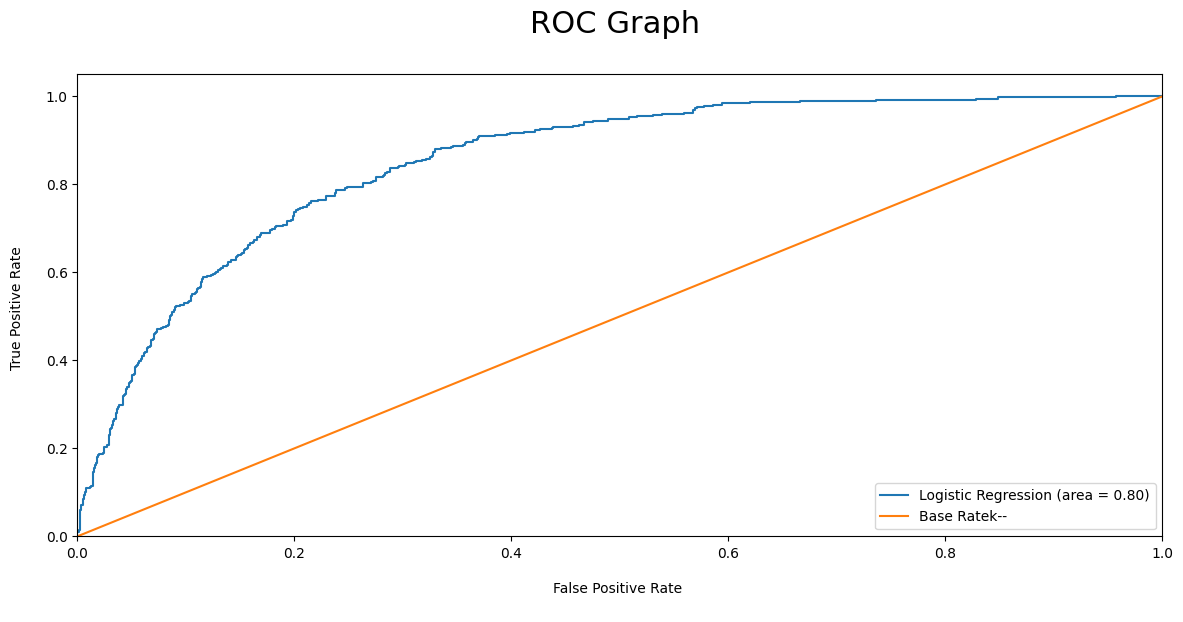

In [ ]:
# Evaluate the model using ROC Graph

classifier_lr.fit(X_train, y_train)
probs = classifier_lr.predict_proba(X_test)
probs = probs[:, 1]
classifier_lr_roc_auc = accuracy_score(y_test, y_pred_lr )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_lr.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_lr_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()


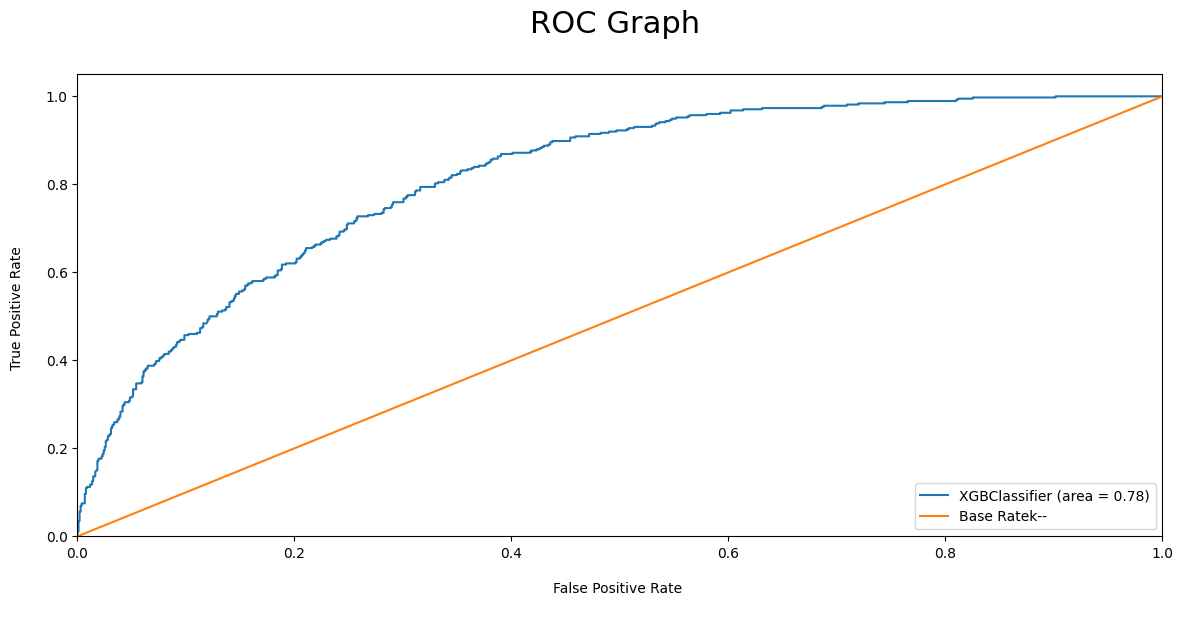

In [ ]:
# Evaluate the model using ROC Graph

classifier_xgb.fit(X_train, y_train)
probs = classifier_xgb.predict_proba(X_test)
probs = probs[:, 1]
classifier_xgb_roc_auc = accuracy_score(y_test, y_pred_xgb )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_xgb.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot XGBoost ROC
plt.plot(rf_fpr, rf_tpr, label='XGBClassifier (area = %0.2f)' % classifier_xgb_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()


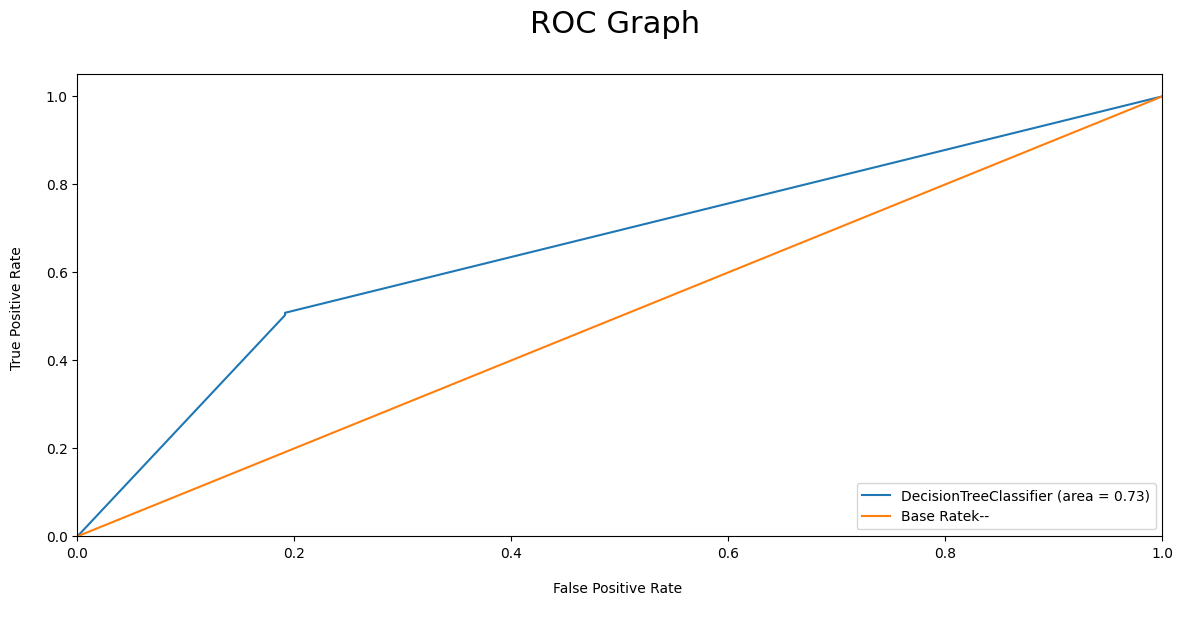

In [ ]:
# Evaluate the model using ROC Graph

classifier_dt.fit(X_train, y_train)
probs = classifier_dt.predict_proba(X_test)
probs = probs[:, 1]
classifier_dt_roc_auc = accuracy_score(y_test, y_pred_dt )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_dt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Decision Tree ROC
plt.plot(rf_fpr, rf_tpr, label='DecisionTreeClassifier (area = %0.2f)' % classifier_dt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()


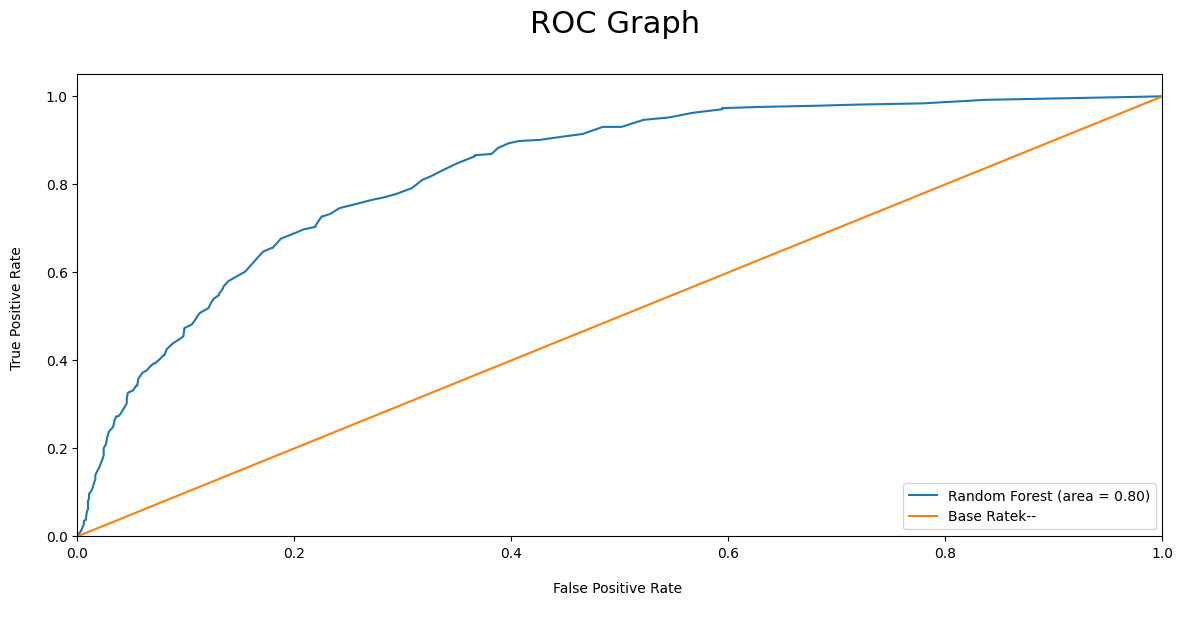

In [ ]:
# Evaluate the model using ROC Graph

classifier_rf.fit(X_train, y_train)
probs = classifier_rf.predict_proba(X_test)
probs = probs[:, 1]
classifier_rf_roc_auc = accuracy_score(y_test, y_pred_lr )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % classifier_rf_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()


#Task 1
Do the exact same modelling process, but with preprocessing : handling imbalance data !

## 12. Generate training and test datasets of dependent and independent variables


In [ ]:
#Step 12: Generate training and test datasets of dependent and independent variables-----------------
#Step

X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    stratify=response,
                                                    test_size = 0.2, #use 0.1 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 41)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 41)
Number transactions y_test dataset:  (1409,)


In [ ]:
print('Raw Data Target Percentage')
print('Churn : {}'.format(response.value_counts()[1]/response.value_counts().sum()*100))
print('Not Churn : {}'.format(response.value_counts()[0]/response.value_counts().sum()*100))

Raw Data Target Percentage
Churn : 26.536987079369588
Not Churn : 73.4630129206304


In [ ]:
# Step 13: Removing Identifiers-------------------------------------------------------------------
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])

test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,1,0,0,1,41,1,0,70.20,2895.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
5807,1,0,0,0,57,1,0,18.80,1094.0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
5118,0,0,1,0,42,1,1,85.90,3730.0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0
275,1,0,1,0,5,1,1,85.40,401.0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
1350,0,0,1,0,67,1,0,65.65,4323.0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,0,0,0,0,29,1,1,55.25,1620.0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1954,1,0,0,0,1,1,1,75.45,75.0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
525,1,0,0,0,52,1,0,91.25,4738.0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
5748,0,0,0,0,21,1,1,99.85,1993.0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0


## 14. Feature Scaling

In [ ]:
# Step 14: Feature Scaling-----------------------------------------------------------------------

sc_X = StandardScaler()
X_train2 =pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

## 15. Model Selection

### Step 15.1: Compare Baseline Classification Algorithms

In [ ]:
#Step 15.1: Compare Baseline Classification Algorithms - First Iteration
#Using Accuracy and ROC AUC Mean Metrics


models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

# Other models
models.append(('Random Forest', RandomForestClassifier(n_estimators = 100, criterion='entropy',random_state = 0 )))

models.append(('XGBoost', XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=3)))

from sklearn.tree import DecisionTreeClassifier
models.append(('Decision Tree', DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_split=2)))


#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

from sklearn import model_selection

i=0
#Evaluate model dengan K-Fold Cross Validation
for name, model in models:
  kfold = model_selection.KFold(n_splits=10) #10 Fold Cross Validation
  cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(name)
  model_results.loc[i] = [name, round(cv_auc_results.mean()*100,2),
                          round(cv_auc_results.std()*100,2),
                          round(cv_acc_results.mean()*100,2),
                          round(cv_acc_results.std()*100,2)]
  i+=1
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,XGBoost,84.58,1.87,80.42,1.17
0,Logistic Regression,84.34,1.62,74.42,1.15
1,Random Forest,82.46,2.22,79.32,1.43
3,Decision Tree,81.78,1.39,79.00,1.41


### Step 15.2.  Visualize Classification Algorithms Accuracy Comparisons

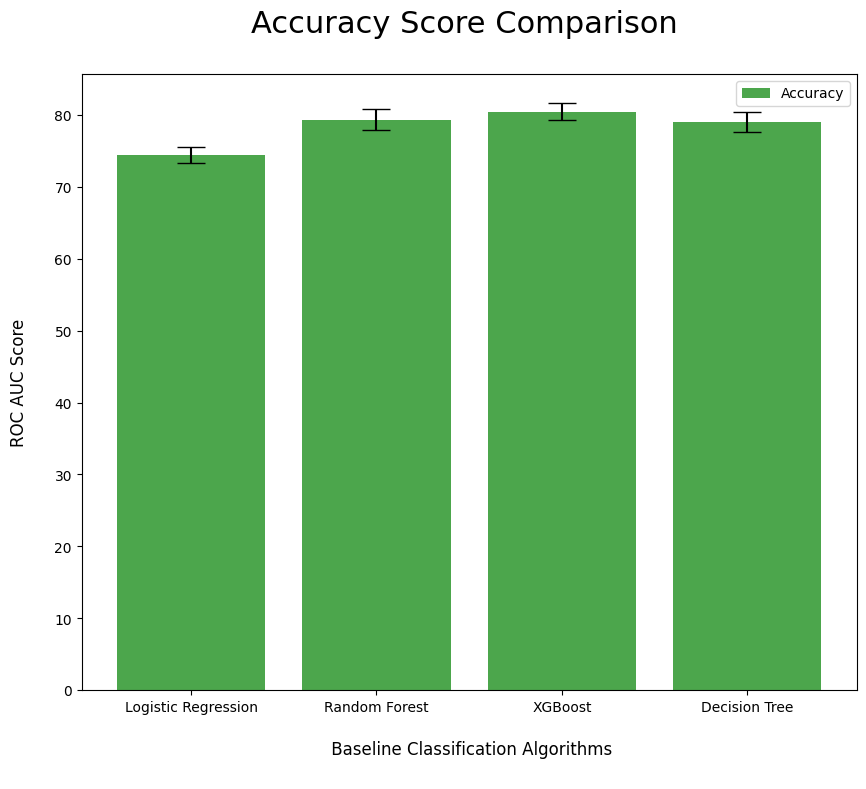

In [ ]:
#Step 15.2.  Visualize Classification Algorithms Accuracy Comparisons:-----------------------------------


#Using Accuracy Mean:

# Bar chart for Accuracy Mean
fig, (ax1) = plt.subplots(nrows=1, sharex=True, figsize=(10, 8))

# Bar chart for Accuracy Mean
ax1.bar(model_results['Algorithm'], model_results['Accuracy Mean'], yerr=model_results['Accuracy STD'],
        align='center', alpha=0.7, capsize=10, color='green', label='Accuracy')

plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

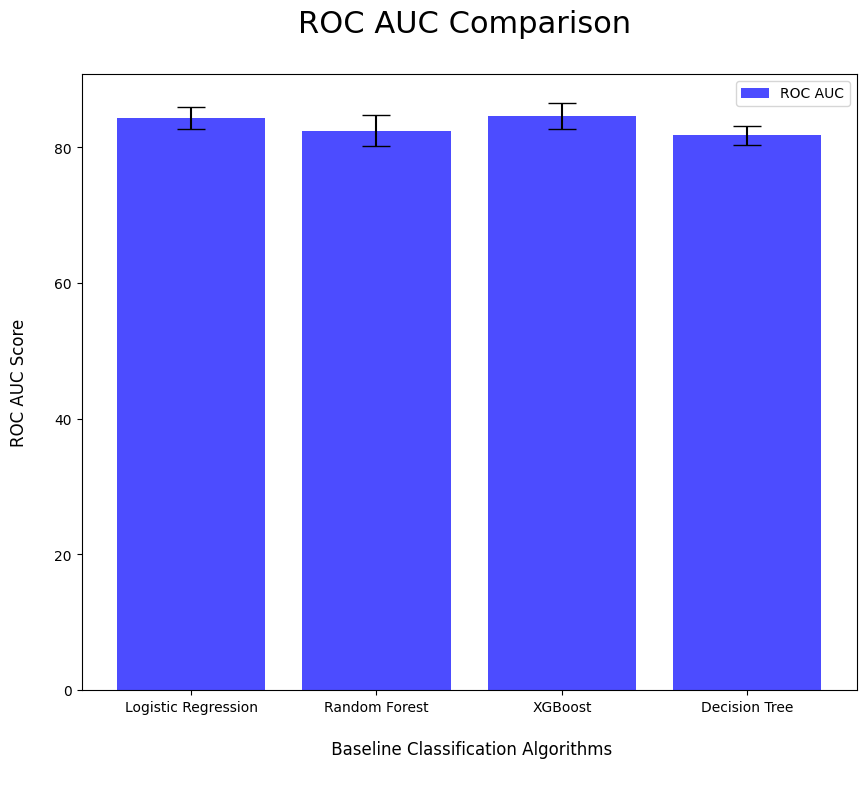

In [ ]:
#using Area under ROC Curve:

fig, (ax2) = plt.subplots(nrows=1, sharex=True, figsize=(10, 8))

# Bar chart for ROC AUC Mean
ax2.bar(model_results['Algorithm'], model_results['ROC AUC Mean'], yerr=model_results['ROC AUC STD'],
        align='center', alpha=0.7, capsize=10, color='blue', label='ROC AUC')
ax2.set_ylabel('ROC AUC Score')
ax2.set_title('ROC AUC Score Comparison')

plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

### Step 15.3. SMOTE Oversampling

Tahap oversampling ini dilakukan pada tahap setelah data split dan cross validation ROC_AUC Scoring. Lalu hanya diaplikasikan hanya pada training set. Hal tersebut dikarenakan kalau dilakukan pada tahap sebelum splitting dan Cross_validation maka akan merubah hasil validation menjadi 50: 50 sementara seharusnya yaitu sekitar 74 : 26.

In [ ]:
from imblearn.over_sampling import SMOTE
# Menggabungkan features dan target untuk oversampling hanya pada training set
train_data = pd.concat([X_train, y_train], axis=1)

# Mengidentifikasi kolom target
response_col = 'Churn'

# Mengidentifikasi kolom prediktor
predictors_cols = [col for col in train_data.columns if col != response_col]

# Memisahkan data menjadi features (X_train) dan target (y_train)
X_train = train_data[predictors_cols]
y_train = train_data[response_col]

# Inisialisasi SMOTE dengan stratified oversampling
smote = SMOTE(random_state=42)

# Melakukan oversampling hanya pada training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

###Step 15.4. Compare Baseline Classification Algorithms

In [ ]:
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0, class_weight='balanced')),
    ('XGBoost', XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=3)),
    ('Decision Tree', DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_split=2))
]

# Evaluating Model Results after oversampling:
acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

# Evaluate models with K-Fold Cross Validation after oversampling
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)  # 10 Fold Cross Validation
    cv_acc_results = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kfold, scoring='accuracy')
    cv_auc_results = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[len(model_results)] = [name, round(cv_auc_results.mean() * 100, 2),
                                              round(cv_auc_results.std() * 100, 2),
                                              round(cv_acc_results.mean() * 100, 2),
                                              round(cv_acc_results.std() * 100, 2)]

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,93.14,0.86,85.67,1.01
2,XGBoost,92.83,0.90,84.66,1.17
0,Logistic Regression,85.89,1.03,77.87,1.21
3,Decision Tree,82.51,1.03,76.76,1.04


In [ ]:
#Step 15.4. Compare Baseline Classification Algorithms - Second Iteration-----------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
import pandas as pd

# Fit Logistic Regression on the Training dataset:
classifier_lr = LogisticRegression(random_state=0, penalty='l2')
classifier_lr.fit(X_train_resampled, y_train_resampled)

# Predict the Test set results
y_pred_lr = classifier_lr.predict(X_test)

# Evaluate Model Results on Test Set:
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
f2_lr = fbeta_score(y_test, y_pred_lr, beta=2.0)

results_lr = pd.DataFrame([['Logistic Regression', acc_lr, prec_lr, rec_lr, f1_lr, f2_lr]],
                          columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# Fit XGBoost on the Training dataset
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(X_train_resampled, y_train_resampled)

# Predict the Test set results
y_pred_xgb = classifier_xgb.predict(X_test)

# Evaluate Model Results on Test Set:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
f2_xgb = fbeta_score(y_test, y_pred_xgb, beta=2.0)

results_xgb = pd.DataFrame([['XGBoost', acc_xgb, prec_xgb, rec_xgb, f1_xgb, f2_xgb]],
                           columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# Fit Decision Tree on the Training dataset
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_dt.fit(X_train_resampled, y_train_resampled)

# Predict the Test set results
y_pred_dt = classifier_dt.predict(X_test)

# Evaluate Model Results on Test Set:
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
f2_dt = fbeta_score(y_test, y_pred_dt, beta=2.0)

results_dt = pd.DataFrame([['Decision Tree', acc_dt, prec_dt, rec_dt, f1_dt, f2_dt]],
                          columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# Fit Random Forest on the Training dataset
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(X_train_resampled, y_train_resampled)

# Predict the Test set results
y_pred_rf = classifier_rf.predict(X_test)

# Evaluate Model Results on Test Set:
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
f2_rf = fbeta_score(y_test, y_pred_rf, beta=2.0)

results_rf = pd.DataFrame([['Random Forest', acc_rf, prec_rf, rec_rf, f1_rf, f2_rf]],
                          columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# Gabungkan hasil dari semua model
all_results2 = pd.concat([results_lr, results_xgb, results_dt, results_rf], ignore_index=True)
print(all_results2)


                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.761533   0.533808  0.802139  0.641026  0.728863
1              XGBoost  0.777147   0.583333  0.561497  0.572207  0.565733
2        Decision Tree  0.736693   0.503704  0.545455  0.523748  0.536560
3        Random Forest  0.780696   0.594203  0.548128  0.570236  0.556763


###Step 15.5. Visualize the results and compare the baseline algorithms

<ipython-input-369-2625d999294f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Precision", y="Model", data=all_results2, palette="viridis")
<ipython-input-369-2625d999294f>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Recall", y="Model", data=all_results2, palette="viridis")
<ipython-input-369-2625d999294f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F2 Score", y="Model", data=all_results2, palette="viridis")
<ipython-input-369-2625d999294f>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

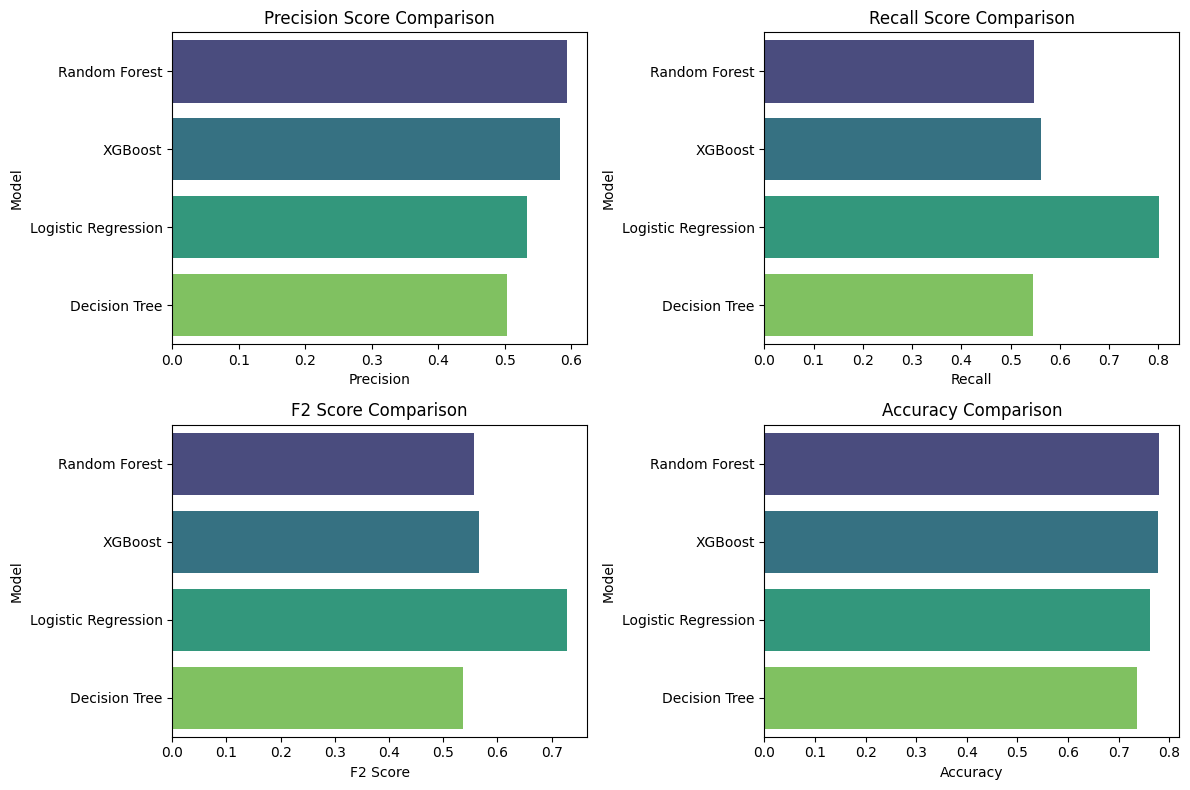

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Step 15.5. Visualize the results and compare the baseline algorithms----------------------------------

# =======================================================================================================================
#Sort results based on the right classification metric:
#(Accuracy/ROC_AUC / Precision/Recall/F1/F2 scores)

#Since we have class imbalance. When we look into the business challenge,
# our false negatives will be costly and hence we need to Keep an eye onto the Precision, Recall & F2 score besides accuracy
# =======================================================================================================================

# Since we have class imbalance, prioritize Precision, Recall & F2 Score besides accuracy
all_results2 = all_results2.sort_values(["Precision", "Recall", "F2 Score"], ascending=False)

# Visualize the results
plt.figure(figsize=(12, 8))

# Plot Precision
plt.subplot(2, 2, 1)
sns.barplot(x="Precision", y="Model", data=all_results2, palette="viridis")
plt.title("Precision Score Comparison")

# Plot Recall
plt.subplot(2, 2, 2)
sns.barplot(x="Recall", y="Model", data=all_results2, palette="viridis")
plt.title("Recall Score Comparison")

# Plot F2 Score
plt.subplot(2, 2, 3)
sns.barplot(x="F2 Score", y="Model", data=all_results2, palette="viridis")
plt.title("F2 Score Comparison")

# Plot Accuracy
plt.subplot(2, 2, 4)
sns.barplot(x="Accuracy", y="Model", data=all_results2, palette="viridis")
plt.title("Accuracy Comparison")

plt.tight_layout()
plt.show()


## 16. Train & Evaluate Chosen Model

In [ ]:
#Step 16: Train & evaluate Chosen Model---------------------------------------------

# Fit Logistic Regression on the Training dataset:

classifier_lr = LogisticRegression(random_state = 0, penalty = 'l2')
classifier_lr.fit(X_train_resampled, y_train_resampled)


# Predict the Test set results

y_pred = classifier_lr.predict(X_test)


#Evaluate Model Results on Test Set:

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.761533   0.533808  0.802139  0.641026  0.728863


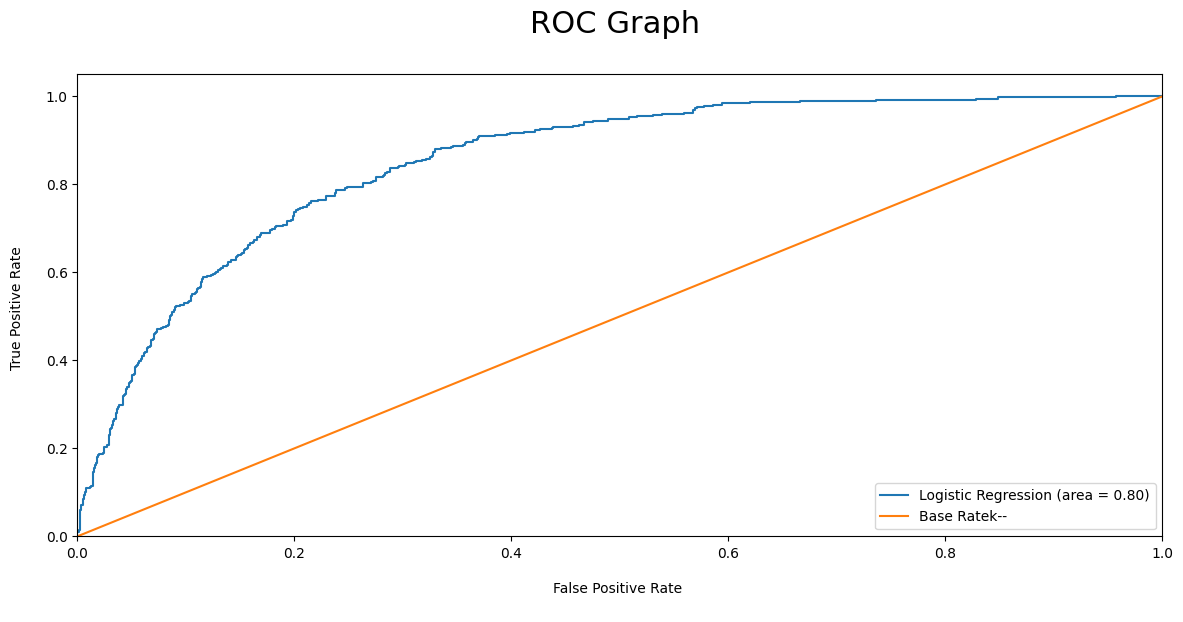

In [ ]:
# Evaluate the model using ROC Graph

classifier_lr.fit(X_train, y_train)
probs = classifier_lr.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_lr.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_lr_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()


##Analysis

---



In [ ]:
print ('Result Before Oversampling : ')
print (all_results1)
print ('  ')
print ('Result After Oversampling : ')
print (all_results2)

Result Before Oversampling : 
                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.801278   0.647799  0.550802  0.595376  0.567806
1              XGBoost  0.777147   0.599338  0.483957  0.535503  0.503337
2        Decision Tree  0.727466   0.487047  0.502674  0.494737  0.499469
3        Random Forest  0.787793   0.634409  0.473262  0.542113  0.498592
  
Result After Oversampling : 
                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
3        Random Forest  0.780696   0.594203  0.548128  0.570236  0.556763
1              XGBoost  0.777147   0.583333  0.561497  0.572207  0.565733
0  Logistic Regression  0.761533   0.533808  0.802139  0.641026  0.728863
2        Decision Tree  0.736693   0.503704  0.545455  0.523748  0.536560


Apa insight yang bisa didapat dengan handling data imbalance pada data diatas? Teknik apa yang anda gunakan? Jelaskan!

Answer:<br>
- Oversampling Berpengaruh pada Recall: Setelah oversampling, terlihat peningkatan yang signifikan pada recall untuk semua model. Sebelum oversampling, recall cenderung rendah, tetapi setelah oversampling, model lebih baik dalam mengidentifikasi kasus positif.

- Pengaruh pada Precision: Meskipun recall meningkat, terdapat penurunan presisi pada beberapa model, khususnya pada Logistic Regression. Ini menunjukkan bahwa oversampling dapat membantu model untuk lebih baik dalam mengidentifikasi kasus positif, tetapi mungkin dengan biaya peningkatan jumlah false positive.

<br>
Teknik yang digunakan yaitu SMOTE (Synthetic Minority Over-sampling Technique). Dimana dengan menggunakan SMOTE akan membuat sampel-sampel sintetis baru untuk kelas minoritas (churn) berdasarkan sampel-sampel yang sudah ada. Dengan cara ini, SMOTE membantu meningkatkan jumlah sampel pada kelas minoritas sehingga model dapat belajar dengan lebih baik dan menghasilkan hasil yang lebih seimbang.